## Overview 
### 1) Understand the shape of the data (Histograms, box plots, etc.)

### 2) Data Cleaning 

### 3) Data Exploration

### 4) Feature Engineering 

### 5) Data Preprocessing for Model

### 6) Basic Model Building 

### 7) Model Tuning 

### 8) Ensemble Modle Building 

### 9) Results 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

Here we import the data. For this analysis, we will be exclusively working with the Training set. We will be validating based on data from the training set as well. For our final submissions, we will make predictions based on the test set.

In [67]:
training = pd.read_csv('/home/khalid/MyWork/SHAI Khalid Allam/Task 8: intro to classification/train.csv')
test = pd.read_csv('/home/khalid/MyWork/SHAI Khalid Allam/Task 8: intro to classification/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

## Project Planning
When starting any project, I like to outline the steps that I plan to take. Below is the rough outline that I created for this project using commented cells. 

In [3]:
# Understand nature of the data .info() .describe()
# Histograms and boxplots 
# Value counts 
# Missing data 
# Correlation between the metrics 
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent? 
# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?

# Model Baseline 
# Model comparison with CV 

## Light Data Exploration
### 1) For numeric data 
* Made histograms to understand distributions 
* Corrplot 
* Pivot table comparing survival rate across numeric variables 


### 2) For Categorical Data 
* Made bar charts to understand balance of classes 
* Made pivot tables to understand relationship with survival 

In [4]:
#quick look at our data types & null counts 
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
#quick way to separate numeric columns
training.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [7]:
# look at numeric and categorical values separately 
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

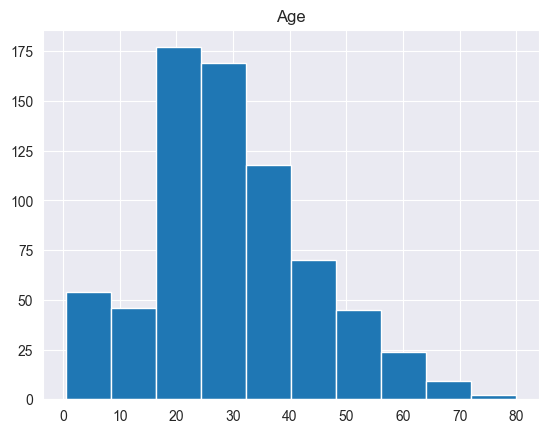

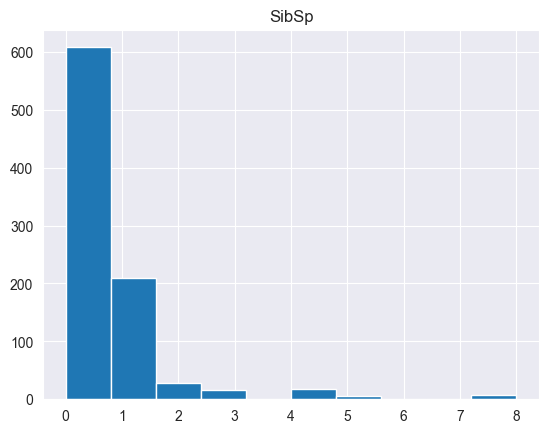

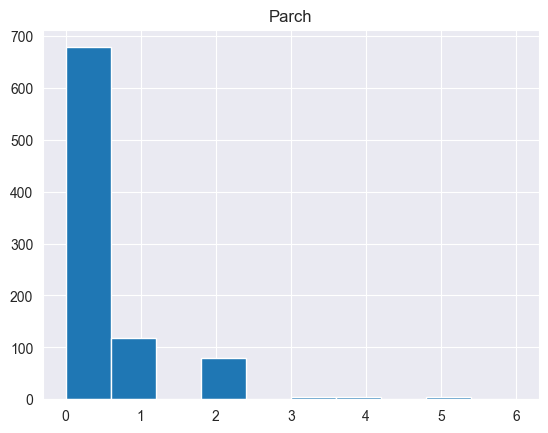

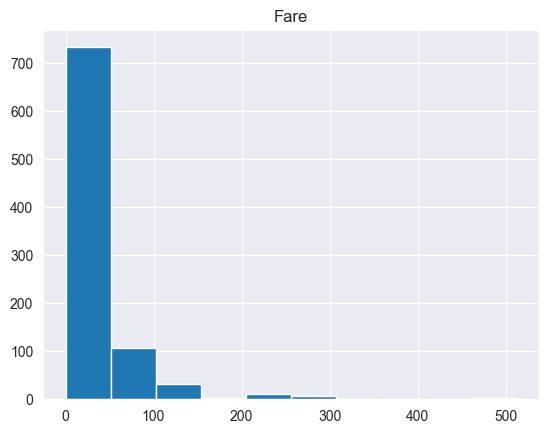

In [8]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Perhaps we should take the non-normal distributions and consider normalizing them?


<Axes: >

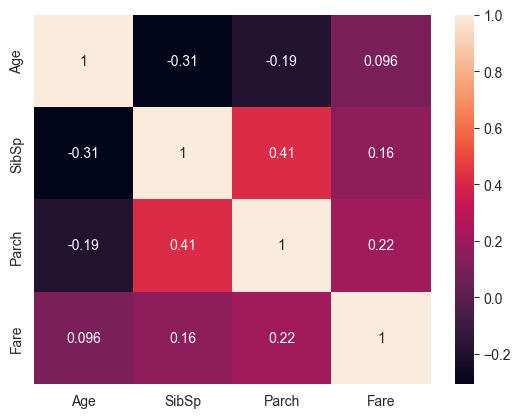

In [9]:
sns.heatmap(df_num.corr(), annot=True)

In [10]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


- `pd.pivot_table`: This is the pandas function used to create a pivot table.
- `training`: This is the DataFrame containing the Titanic dataset.
- `index='Survived'`: This sets the rows of the pivot table to be indexed by the `Survived` column. This means that the pivot table will have separate rows for passengers who survived (`Survived` = 1) and those who did not (`Survived` = 0).
- `values=['Age', 'SibSp', 'Parch', 'Fare']`: These are the columns for which we want to calculate summary statistics. The pivot table will summarize the `Age`, `SibSp` (number of siblings/spouses aboard), `Parch` (number of parents/children aboard), and `Fare` columns.

Overall Insights
1. **Survival and Socioeconomic Status**: Higher fare-paying passengers had a better chance of survival, suggesting a correlation between socioeconomic status and survival.
2. **Family Size and Survival**: Passengers with more family members aboard (both siblings/spouses and parents/children) had a slightly lower chance of survival. This might indicate the challenges of coordinating evacuations for larger groups.
3. **Age and Survival**: Younger passengers had a slightly higher chance of survival compared to older passengers, although the difference in average age is small.

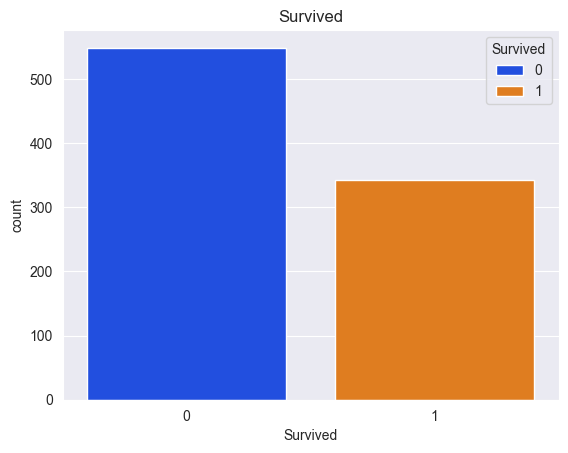

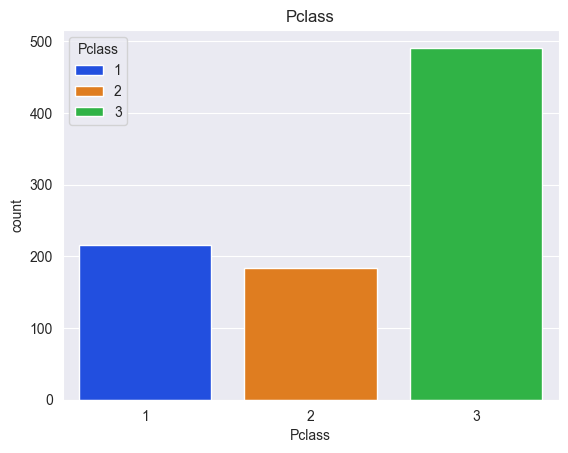

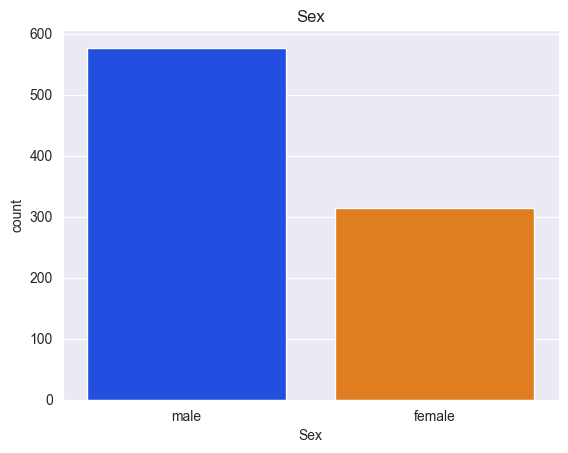

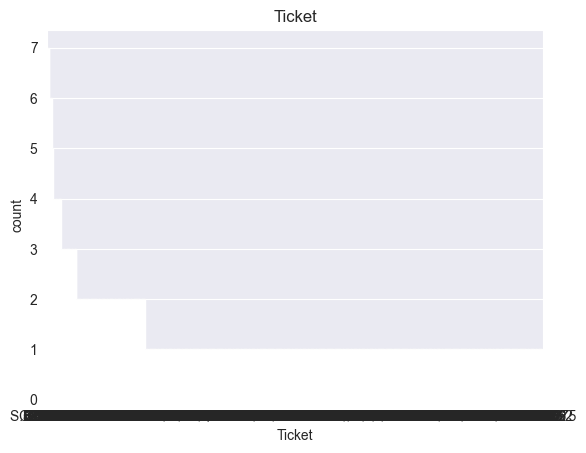

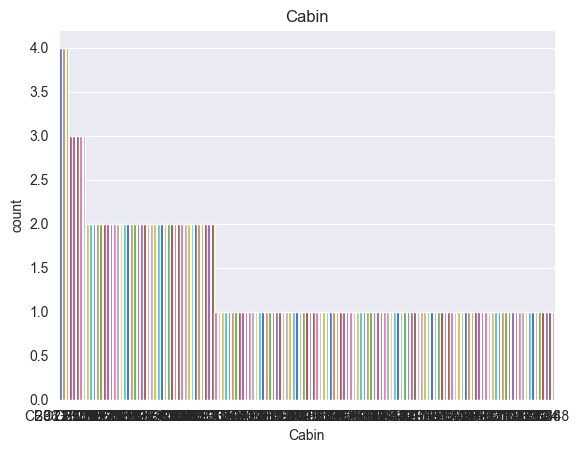

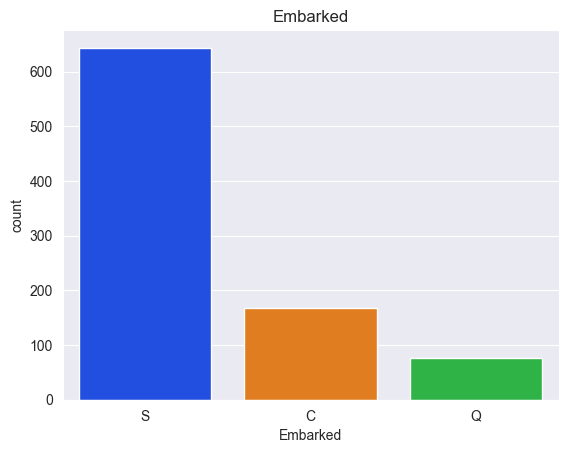

In [11]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index,y=df_cat[i].value_counts(), palette="bright", hue=df_cat[i].value_counts().index).set_title(i)
    plt.show()

Cabin and ticket graphs are very messy. This is an area where we may want to do some feature engineering! 

In [12]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(data=training, values="Ticket", index="Survived", columns="Pclass", aggfunc="count"))
print()

print(pd.pivot_table(data=training, values="Ticket", index="Survived", columns="Sex", aggfunc="count"))
print()

print(pd.pivot_table(data=training, values="Ticket", index="Survived", columns="Embarked", aggfunc="count"))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



The `pd.pivot_table()` function in Pandas is used to create a pivot table, which is a summary table that allows you to aggregate data based on one or more keys (or indices). Here's a detailed breakdown of the specific pivot table you mentioned:

### Explanation

- **`training`**: This is the DataFrame containing the Titanic dataset.
- **`index='Survived'`**: The rows of the pivot table will be indexed by the 'Survived' column. This means that there will be separate rows for passengers who did not survive (Survived = 0) and those who did (Survived = 1).
- **`columns='Pclass'`**: The columns of the pivot table will be created based on the 'Pclass' column, which represents the passenger class (1st, 2nd, or 3rd class).
- **`values='Ticket'`**: The 'Ticket' column will be used to aggregate the data. In this context, the 'Ticket' values are being counted.
- **`aggfunc='count'`**: The aggregation function specifies how the data should be aggregated. Here, it is counting the number of 'Ticket' values for each combination of 'Survived' and 'Pclass'.


## Feature Engineering 
### 1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

### 2) Tickets - Do different ticket types impact survival rates?

### 3) Does a person's title relate to survival rates? 

**Feature Engineering for the Cabin Feature:**

**1. Cabin - Simplify cabins**

The "Cabin" feature in the Titanic dataset contains the cabin number where a passenger stayed. However, this information is quite detailed and can be simplified for analysis. The process involves creating new features that might capture important aspects of the original "Cabin" feature in a more meaningful way for predictive modeling.

**Steps to Simplify Cabins:**

**a) Cabin Letter (cabin_adv)**

One way to simplify the cabin data is to extract the cabin letter, which generally represents the deck on which the cabin is located. For instance, a cabin labeled "C123" can be simplified to "C". This new feature is called `cabin_adv` (advanced cabin feature).

- **Purpose**: The deck might have an impact on survival, as certain decks might be closer to lifeboats or exits, or might have been assigned to higher-class passengers.

**b) Purchase of Tickets Across Multiple Cabins (cabin_multiple)**

Another aspect to consider is whether a passenger's ticket was associated with multiple cabins. If a ticket is linked to multiple cabins, it might indicate that the passenger was part of a larger group or family. This new feature is called `cabin_multiple`.

- **Purpose**: Group or family travel could impact survival rates. For example, groups might stay together during evacuation, which could either hinder or help survival depending on the circumstances.


In [13]:
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))) 
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
training['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [14]:
pd.pivot_table(data=training, values='Ticket', index='Survived', columns='cabin_multiple', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [15]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category


training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [16]:
pd.pivot_table(data=training, values='Ticket', index='Survived', columns='cabin_adv', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


**2) Tickets - Do Different Ticket Types Impact Survival Rates?**

In the Titanic dataset, the "Ticket" feature contains the ticket numbers for passengers. These ticket numbers can be quite varied and may include both letters and numbers. The hypothesis here is that different ticket types might impact survival rates. For example, tickets with certain prefixes or formats might be associated with different passenger classes or groups, which could influence their likelihood of survival.



**a) Extract Ticket Prefix**

One way to investigate the impact of ticket types is to extract any prefixes from the ticket numbers. Tickets often had prefixes that indicated a particular booking class or group.

- **Purpose**: Determine if the ticket prefix is associated with higher or lower survival rates. Certain prefixes might be linked to specific classes or accommodations.

**b) Simplify Ticket Number**

Another approach is to consider the length of the ticket number or whether it contains letters and numbers. This might reflect different booking practices or categories.

- **Purpose**: Simplify the analysis by categorizing tickets into simpler groups, which could reveal patterns associated with survival.

**Analysis**

With these new features, you can now analyze whether different ticket types (prefixes) or the presence of a prefix impacts survival rates. For example, you might use a pivot table or a group-by operation to see the survival rates for different ticket prefixes:

**Insights**

- **Ticket_Prefix**: Some prefixes might have higher survival rates. For example, "PC" and "STON/O2" in the example data show a 100% survival rate, suggesting these groups might have had better access to lifeboats or were in higher classes.


In [17]:
#understand ticket values better 
#numeric vs non numeric 
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)


In [18]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [19]:
#survival rate across different tyicket types 
pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


*3) Does a Person's Title Relate to Survival Rates?*

In the Titanic dataset, the "Name" feature contains the full name of each passenger, often including their title (e.g., Mr., Mrs., Miss, Master, Dr., etc.). These titles can provide valuable insights into social status, gender, and family roles, all of which could influence survival rates.

*Steps to Analyze Titles*

**a) Extract Titles**

The first step is to extract the title from each passenger's name.

- **Purpose**: Determine if certain titles are associated with higher or lower survival rates. For example, "Mrs." might indicate a higher likelihood of survival due to prioritization of women and children.

**b) Group Rare Titles**

Some titles might be very rare (e.g., "Lady", "Countess"). These can be grouped into a common category to simplify the analysis.

- **Purpose**: Simplify the analysis by reducing the number of unique titles, making patterns easier to identify.


*Explanation of Output*

- **Title**: Extracted the title from each passenger's name. Titles such as "Mr", "Mrs", and "Miss" are retained, while less common titles are grouped into a "Rare" category.

*Analysis*

With these new features, you can now analyze whether different titles impact survival rates. For example, you might use a pivot table to see the survival rates for different titles:

*Insights*

- **Miss**: In the example data, all individuals with the title "Miss" survived, suggesting that women, particularly young unmarried women, had higher survival rates.
- **Mr**: Most of the individuals with the title "Mr" survived, suggesting that adult men had lower survival rates.
- **Mrs**: Most individuals with the title "Mrs" survived, indicating that married women had higher survival rates.

*Summary*

By examining the titles of passengers, you can uncover patterns that impact survival rates on the Titanic. This feature engineering step adds more context and depth to your analysis, potentially improving the predictive power of your models. Titles can serve as proxies for gender, age, and social status, all of which are critical factors in understanding survival rates.

In [20]:
# Extract title from name
training['name_title'] = training['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Group rare titles
title_mapping = {
    "Mr": "Mr", 
    "Mrs": "Mrs", 
    "Miss": "Miss", 
    "Master": "Master",
    "Dr": "Rare", 
    "Rev": "Rare", 
    "Col": "Rare", 
    "Major": "Rare", 
    "Mlle": "Rare", 
    "Countess": "Rare", 
    "Ms": "Rare", 
    "Lady": "Rare", 
    "Jonkheer": "Rare", 
    "Don": "Rare", 
    "Dona": "Rare", 
    "Mme": "Rare", 
    "Capt": "Rare", 
    "Sir": "Rare"
}
training['name_title'] = training['name_title'].map(title_mapping)

In [21]:
training['name_title'].value_counts()

name_title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       26
Name: count, dtype: int64

In [22]:
# Calculate survival rates by title
pd.pivot_table(training, index='Survived',columns='name_title', values = 'Ticket', aggfunc='count')

name_title,Master,Miss,Mr,Mrs,Rare
Survived,,,,,
0,17,55,436,26,15
1,23,127,81,99,11


## Data Preprocessing for Model 
### 1) Drop null values from Embarked (only 2) 

### 2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with) 
Variables:  'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

### 3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder). 

### 4) Impute data with mean for age (Should also experiment with median) 

### 5) Normalized fare using logarithm to give more semblance of a normal distribution 

### 6) Scaled data 0-1 with standard scaler 

(889,)

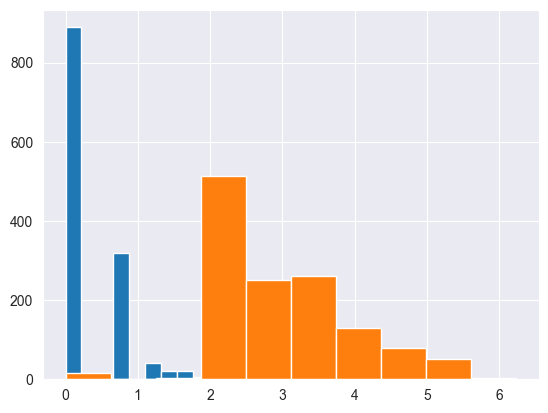

In [68]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [69]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

## Model Building (Baseline Validation Performance)
Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set. 

- Naive Bayes (72.6%)
- Logistic Regression (82.1%)
- Decision Tree (77.6%)
- K Nearest Neighbor (80.5%)
- Random Forest (80.6%)
- **Support Vector Classifier (83.2%)**
- XGBClassifier (81.1%)
- Soft Voting Classifier - All Models (82.8%)
- StackingClassifier - All Models - final_estimator=LogisticRegression()    (83.1%)

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier



In [74]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.76966292 0.75842697 0.72881356]
0.7255379927632831


In [75]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [77]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [78]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


In [79]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [80]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [81]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.80898876 0.85393258 0.78651685 0.80225989]
0.8110137751539389


In [82]:
#Voting classifier takes all the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If the average confidence is > 50% that it is a 1 it will be counted as such
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [85]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.81460674 0.83146067 0.79775281 0.84745763]
0.8234241096933917


In [110]:
# A Stacked Classifier (or Stacking) combines the predictions from multiple base learners using a meta-learner (also called a second-level model) that learns how to best combine the predictions from the base learners.
from sklearn.ensemble import StackingClassifier
stacking_clf = StackingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], final_estimator=LogisticRegression())


In [111]:
cv = cross_val_score(stacking_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84269663 0.81460674 0.83707865 0.80337079 0.85875706]
0.8313019742271314


# Submission

In [113]:
stacking_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = stacking_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [125]:
svc.fit(X_train_scaled,y_train)
y_hat_svc = svc.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_svc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('svc_submission.csv', index=False)

# Plotting

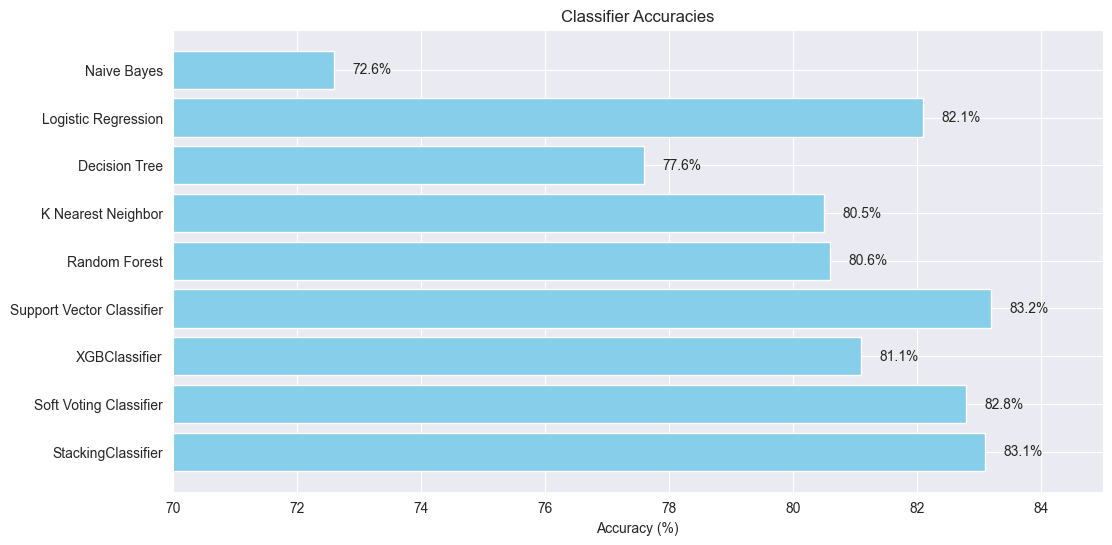

In [126]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = [
    'Naive Bayes', 'Logistic Regression', 'Decision Tree', 
    'K Nearest Neighbor', 'Random Forest', 'Support Vector Classifier', 
    'XGBClassifier', 'Soft Voting Classifier', 'StackingClassifier'
]

# Corresponding accuracies
accuracies = [72.6, 82.1, 77.6, 80.5, 80.6, 83.2, 81.1, 82.8, 83.1]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.xlim(70, 85)  # Set limits to improve readability
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy on top

# Add text annotations to each bar
for i, (accuracy, classifier) in enumerate(zip(accuracies, classifiers)):
    plt.text(accuracy + 0.3, i, f"{accuracy:.1f}%", va='center', ha='left')

plt.show()